<a href="https://colab.research.google.com/github/PhilipAboagye/data_insight/blob/master/healthcare_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Connect Google Colab to Google Sheets**
First, we'll connect Google Colab to your Google Sheet to access the data directly.

a. Authenticate and Install Required Libraries
In Google Colab, run the following code to install and authenticate the required libraries (gspread, pandas, and gspread_dataframe)

In [1]:
# Install necessary libraries
!pip install --upgrade gspread pandas gspread-dataframe

# Authenticate your Google account
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
from gspread_dataframe import get_as_dataframe


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 32.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: gspread
    Found existing installation: gspread 6.0.2
    Uninstalling gspread-6.0.2:
      Successfully uninstalled gspread-6.0.2
  Attempting uninstall: gspread-dataframe
    Found existing installation: gspread-dataframe 3.3.1
    Uninstalling gspread-dataframe-3.3.1:
      Successfully uninstalled gspread-dataframe-3.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which i

## **B. Access Your Google Sheet**
To access your Google Sheet, you'll need to share the sheet with the email client_email (you can get this from the credentials provided after authentication).

Replace 'your-sheet-id' with the actual Google Sheet ID, which you can find in the URL of your Google Sheet.

In [2]:
# Authorize and load your Google Sheet
creds, _ = default()
gc = gspread.authorize(creds)

# Replace 'your-sheet-id' with the actual sheet ID from the Google Sheet URL
sheet_id = '1wxUI6kDkziDhE3o4VBF0PWohKWSgyUM4uYOIPBq1fH8'
worksheet_name = 'Sheet1'  # Specify the sheet name or index
sheet_url = f"https://docs.google.com/spreadsheets/d/1wxUI6kDkziDhE3o4VBF0PWohKWSgyUM4uYOIPBq1fH8/edit#gid=0"

# Open the Google Sheet
sheet = gc.open_by_url(sheet_url)
worksheet = sheet.worksheet(worksheet_name)

# Convert the sheet data into a pandas DataFrame
df = get_as_dataframe(worksheet, evaluate_formulas=True)
df.head()  # Display the first few rows


,PatientID,Age,Gender,Diagnosis,Treatment,Days in Hospital,Outcome,Cost of Treatment
0,P001,65.0,Male,Diabetes,Medication,5.0,Recovered,3000.0
1,P002,47.0,Female,Hypertension,Surgery,10.0,Ongoing,15000.0
2,P003,59.0,Male,Diabetes,Therapy,7.0,Recovered,8000.0
3,P004,33.0,Female,Asthma,Medication,2.0,Recovered,1200.0
4,P005,72.0,Male,Hypertension,Surgery,12.0,Recovered,17000.0


## **C. Performing Data Analysis**
Here are several useful analyses and visualizations you can do using the healthcare dataset.

Check for Missing Values
This checks for any missing or NaN values in the dataset.

In [3]:
# Check for any missing values
df.isnull().sum()


,0
PatientID,0
Age,0
Gender,0
Diagnosis,0
Treatment,0
Days in Hospital,0
Outcome,0
Cost of Treatment,0


## **D. Summary Statistics**
This provides a quick overview of numerical columns (e.g., age, days in hospital, cost of treatment).

In [4]:
# Get summary statistics for numerical columns
df.describe()


,Age,Days in Hospital,Cost of Treatment
count,10.000000,10.000000,10.000000
mean,52.000000,6.700000,8040.000000
std,14.344957,4.321779,6793.493619
min,29.000000,2.000000,1200.000000
25%,44.000000,3.250000,3125.000000
50%,52.500000,5.500000,5250.000000
75%,63.500000,9.250000,13250.000000
max,72.000000,15.000000,20000.000000


## **E. Visualizing Data**
Distribution of Age and Cost of Treatment
Plot the distribution of the age and treatment cost columns to understand their spread.

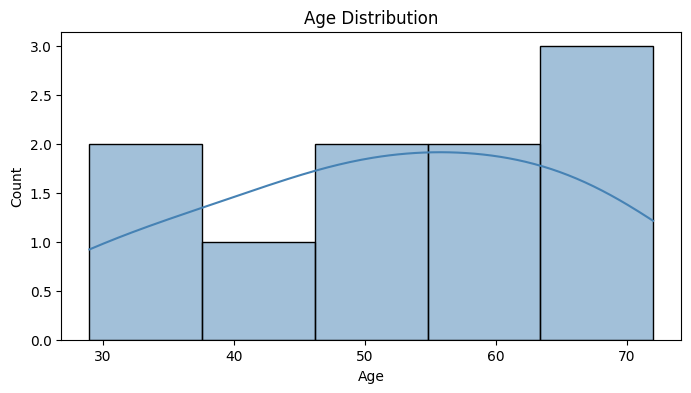

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Age
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], kde=True, color='#4682B4')
plt.title('Age Distribution')
plt.show()




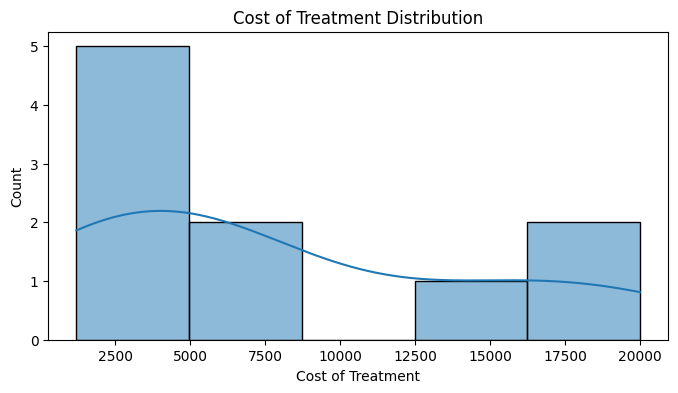

In [7]:
# Distribution of Cost of Treatment
plt.figure(figsize=(8, 4))
sns.histplot(df['Cost of Treatment'], kde=True)
plt.title('Cost of Treatment Distribution')
plt.show()

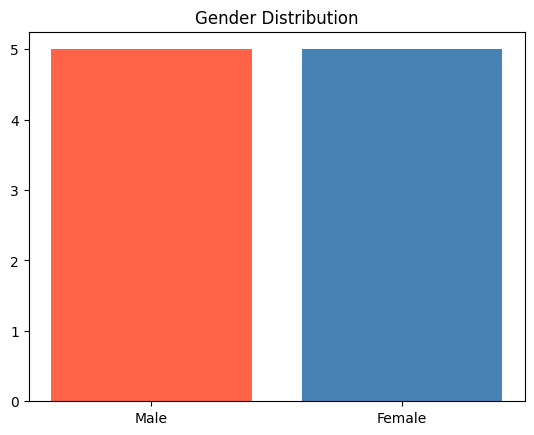

In [22]:
# Gender Distribution Bar Chart with custom colors
plt.bar(df['Gender'].value_counts().index, df['Gender'].value_counts().values, color=['#FF6347', '#4682B4'])
plt.title('Gender Distribution')
plt.show()



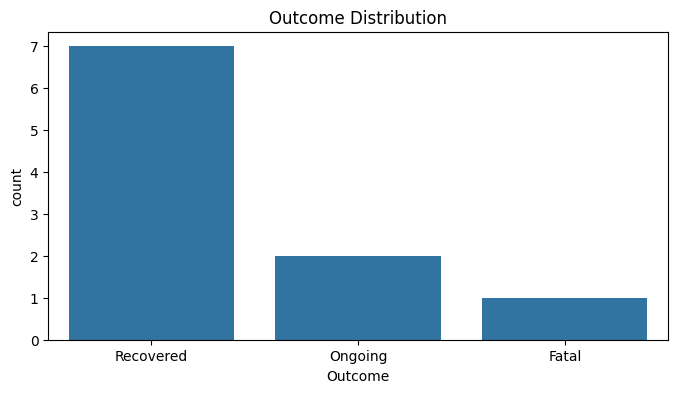

In [12]:
# Outcome Distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Outcome Distribution')
plt.show()


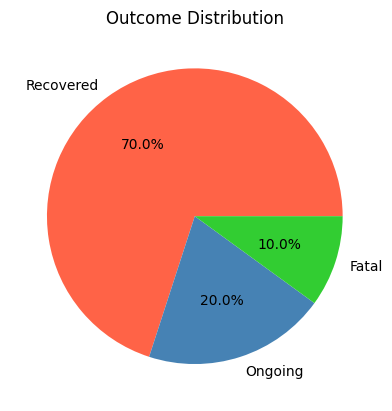

In [21]:
# Pie chart with custom colors
outcome_counts = df['Outcome'].value_counts()
colors = ['#FF6347', '#4682B4', '#32CD32']  # Custom colors for each outcome
plt.pie(outcome_counts, labels=outcome_counts.index, colors=colors, autopct='%1.1f%%')
plt.title('Outcome Distribution')
plt.show()


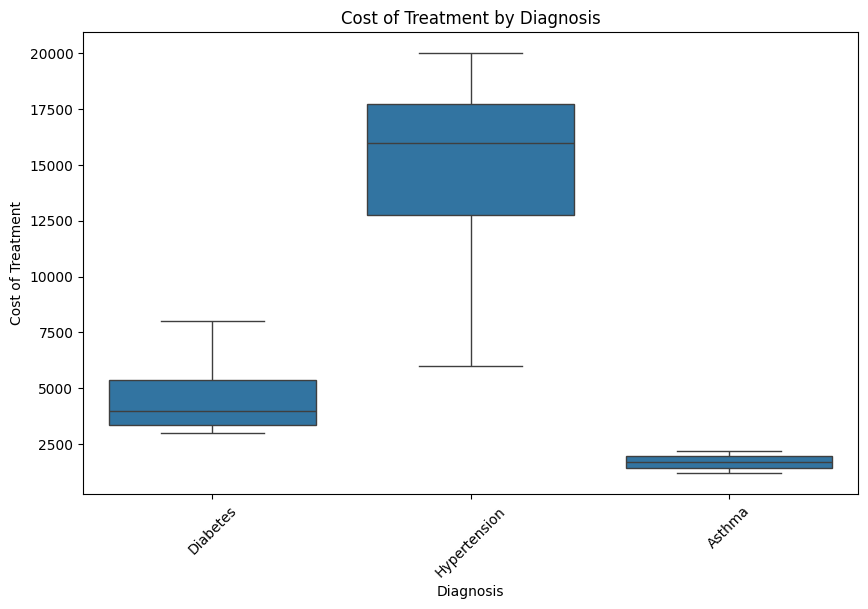

In [13]:
# Box plot to show treatment costs by diagnosis
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diagnosis', y='Cost of Treatment', data=df)
plt.title('Cost of Treatment by Diagnosis')
plt.xticks(rotation=45)
plt.show()


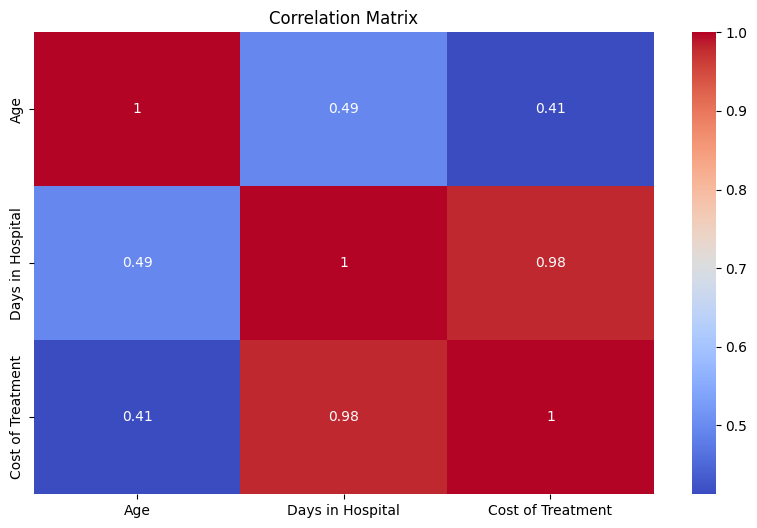

In [14]:
# Correlation matrix for numerical columns
plt.figure(figsize=(10, 6))
correlation = df[['Age', 'Days in Hospital', 'Cost of Treatment']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## **F. Grouping and Pivot Tables**
Group by Diagnosis
Summarize data by calculating the average cost and number of days in the hospital for each diagnosis.

In [15]:
# Group by Diagnosis and calculate mean cost and hospital days
grouped = df.groupby('Diagnosis').agg({'Cost of Treatment': 'mean', 'Days in Hospital': 'mean'})
print(grouped)


              Cost of Treatment  Days in Hospital
Diagnosis                                        
Asthma                   1700.0              2.50
Diabetes                 4750.0              4.75
Hypertension            14500.0             10.75


## **G. Pivot Table for Treatment Costs by Gender and Diagnosis**
Create a pivot table to show the average cost of treatment based on gender and diagnosis.

In [16]:
# Pivot table for average treatment cost by gender and diagnosis
pivot_table = df.pivot_table(values='Cost of Treatment', index='Diagnosis', columns='Gender', aggfunc='mean')
print(pivot_table)


Gender         Female          Male
Diagnosis                          
Asthma         1700.0           NaN
Diabetes       4500.0   4833.333333
Hypertension  10500.0  18500.000000


## **H. Scatter Plot for Age vs. Treatment Cost**
Create a scatter plot to see the relationship between age and the cost of treatment.

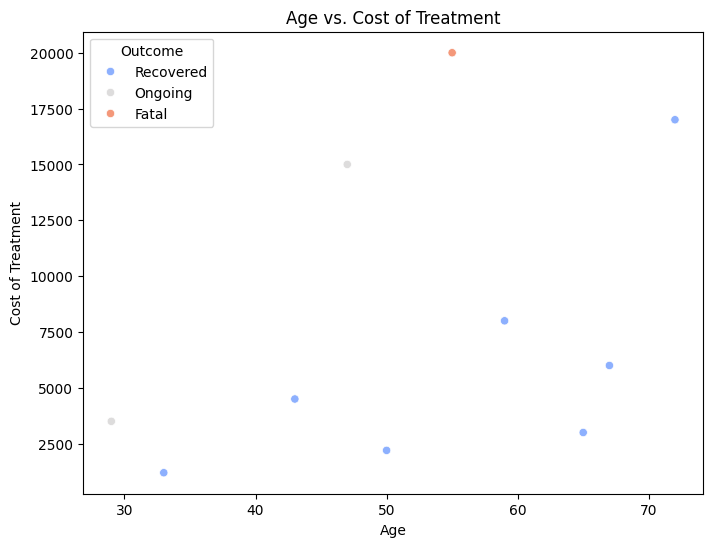

In [17]:
# Scatter plot of Age vs. Cost of Treatment
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Cost of Treatment', hue='Outcome', data=df, palette='coolwarm')
plt.title('Age vs. Cost of Treatment')
plt.show()


In [18]:
from gspread_dataframe import set_with_dataframe

# Export updated DataFrame to Google Sheets
set_with_dataframe(worksheet, df)


In [20]:
# Save DataFrame to CSV file
df.to_csv('updated_healthcare_data.csv', index=False)
